## Importing Data using Kaggle API

In [ ]:
%%capture
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
%%capture
!kaggle competitions download -c isic-2024-challenge
!mkdir data
!unzip isic-2024-challenge.zip -d data

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
from IPython.display import display

In [ ]:
df = pd.read_csv('data/train-metadata.csv')

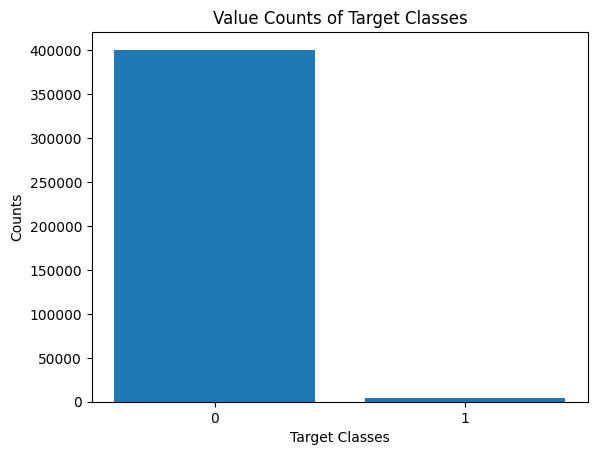

In [ ]:
dist = df.target.value_counts()

plt.bar(dist.index.astype(str), dist.values)
plt.xlabel('Target Classes')
plt.ylabel('Counts')
plt.title('Value Counts of Target Classes')
plt.xticks()
plt.show()

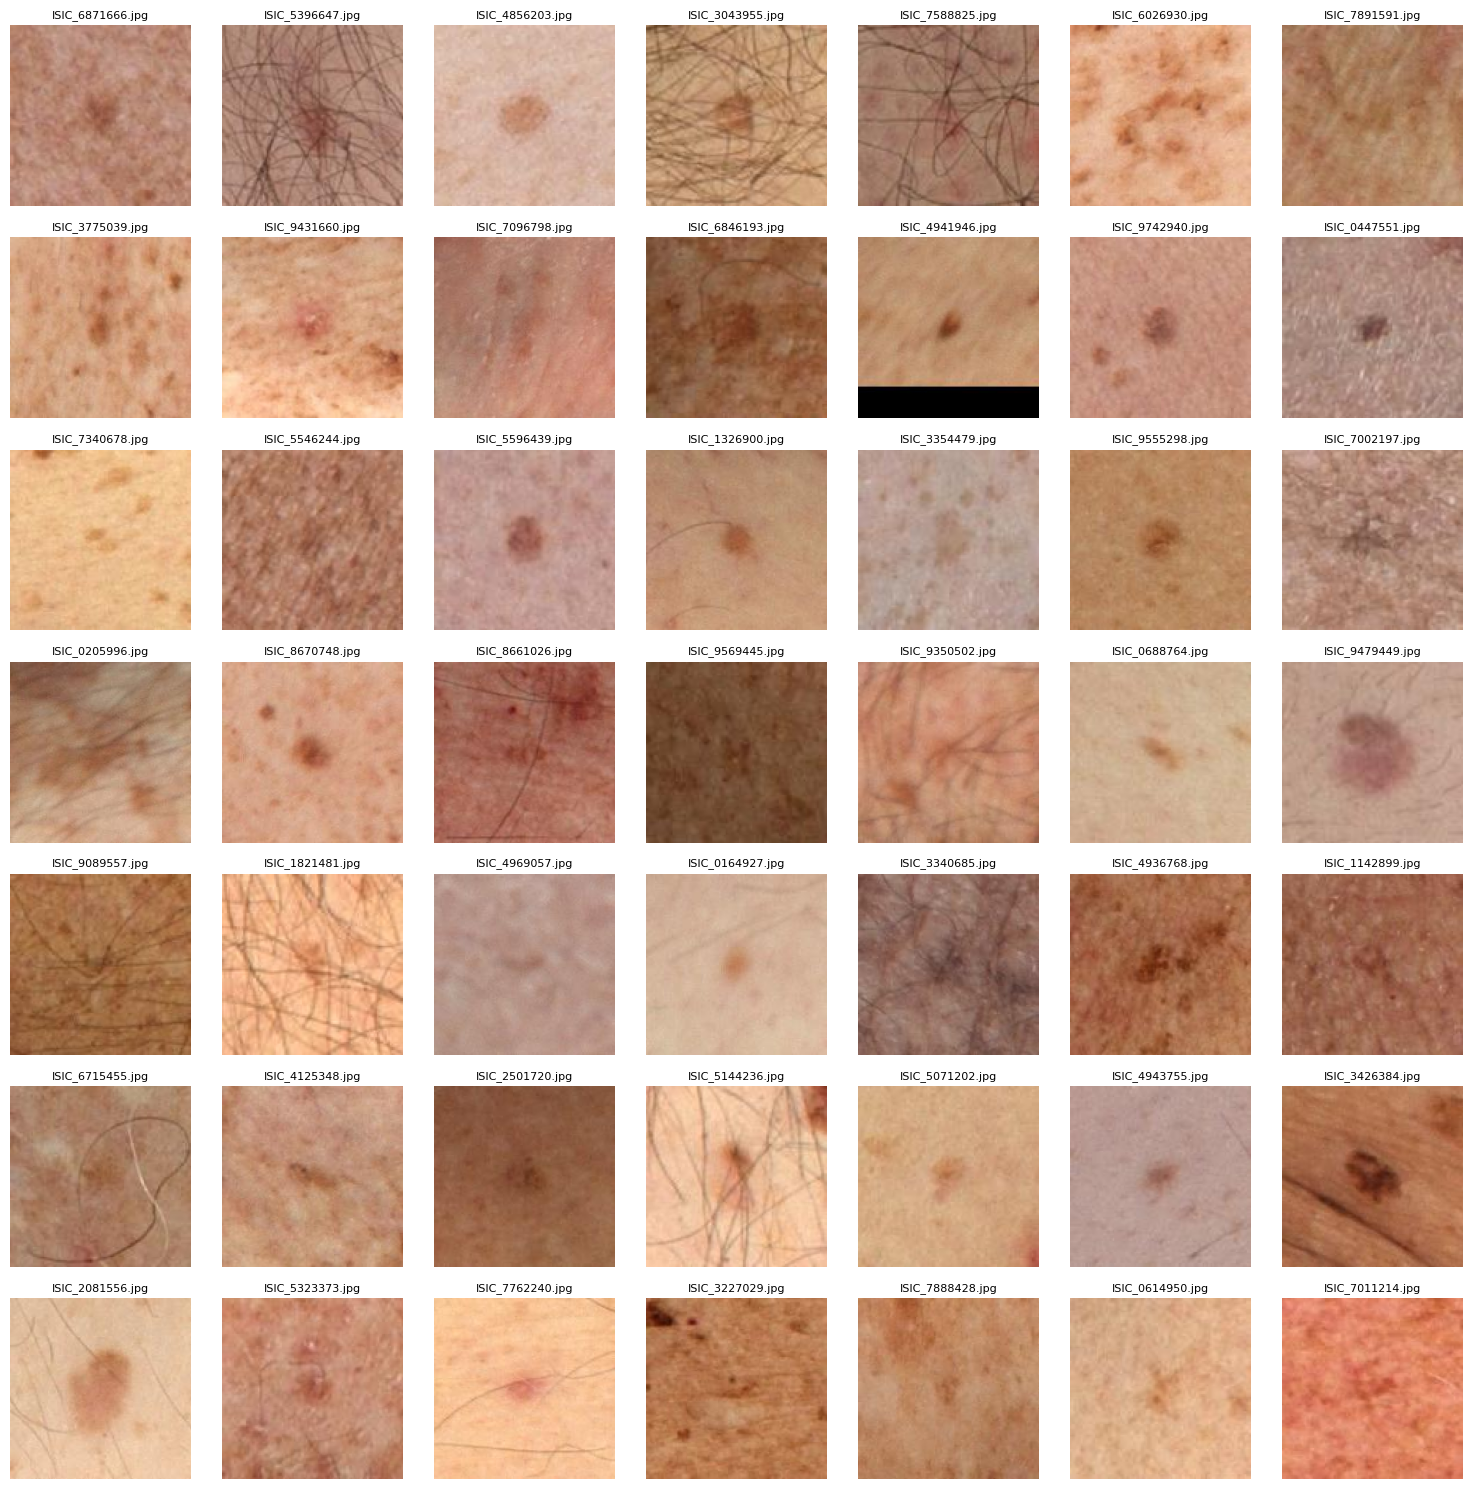

In [48]:
dir_path = 'data/train-image/image/'

files = os.listdir(dir_path)

if files:
    num_images = min(49, len(files))

    rows, cols = 7, 7

    fig, axes = plt.subplots(rows, cols, figsize=(15, 15))

    for i in range(num_images):
        first_image_path = os.path.join(dir_path, files[i])
        image = Image.open(first_image_path)

        ax = axes[i // cols, i % cols]
        ax.imshow(image)
        ax.axis('off')
        ax.set_title(files[i], fontsize=8)

    for j in range(num_images, rows * cols):
        axes[j // cols, j % cols].axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("No images found in the directory.")